                                                                                               Hurgland-Nick KELIET

### Skills added :  
   >- Use of SQL for querying
   >- Data Processing
   >- Scalabilité
   >- "Gradient Boosting Classifier"
   >- "XGBoost Classifier"
   >- "GridSearchCV"
   >- "RandomForestClassifier"
   >- Courbe d'apprentissage

# ----------  Gradient Boosting Classifier : The titanic survivors  ------------

In [1]:
# import des modules 
import pandas as pd
import numpy as np

# import visualisation
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set()

# Algorithme 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Import sql fonctionnality for testing cause i'm proficiency in it
import pandasql as pdsql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

# Ignore les avertissement
import warnings
warnings.filterwarnings('ignore')

# Data Processing

In [2]:
# Chargement des datas
train_data = pd.read_csv("C:/Users/Hurgland-Nick KELIET/Desktop/DataSets/Classification/train.csv")
test_data = pd.read_csv("C:/Users/Hurgland-Nick KELIET/Desktop/DataSets/Classification/test.csv")

In [3]:
# Quick vision à notre dataset de training les 5 prmière lignes
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Taille  de notre train_data
train_data.shape

(891, 12)

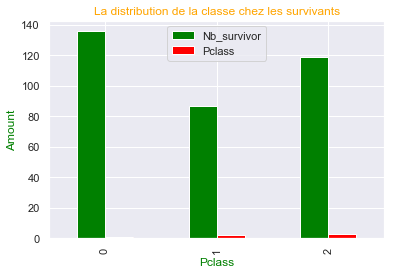

In [5]:
# La distribution de la classe chez les survivants
q = ''' Select count(Pclass) as Nb_survivor, Pclass from train_data where survived == 1 group by Pclass'''
# Affichons notre requête
df = pysqldf(q)
df.plot.bar(color=["green","red"])
plt.title("La distribution de la classe chez les survivants", color='orange')
plt.xlabel("Pclass", color='green')
plt.ylabel("Amount", color='green')
plt.show()

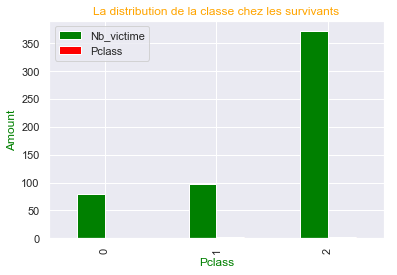

In [6]:
# La distribution de la classe chez les victimes
q = ''' Select count(Pclass) as Nb_victime, Pclass from train_data where survived == 0 group by Pclass'''
# Affichons notre requête
df = pysqldf(q)
df.plot.bar(color=["green","red"])
plt.title("La distribution de la classe chez les survivants", color='orange')
plt.xlabel("Pclass", color='green')
plt.ylabel("Amount", color='green')
plt.show()

- Une forte majorité des victimes proviennent de la classe 3
- Les survivants proviennent de la classe 1

In [7]:
# Quick vision à notre dataset de test
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# Taille  de notre train_data
test_data.shape

(418, 11)

 - On peut voir que nous avons une colonne PassengerId qui ne nous est pas utile
 - Mettons en index

In [9]:
# Selectionnons nos Feature et labels
y_train = train_data["Survived"]
train_data.drop(["Survived"], axis = 1, inplace=True)

In [10]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [11]:
train_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Créons un dataset complet
# Append va ajouter un dataset ou une portion de dataset sous un autre dataset
full_data = train_data.append(test_data)

In [13]:
full_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


On peut voir que nous avons désormais 1309 rows qui est de base : data_train = 891 + data_test = 418.
On est bien alors

In [14]:
# Selectionnons les colonnes qui ne nous sert à rien 
drop_cols = ['Name','SibSp','Ticket','Cabin','Parch','Embarked']

# Effaçons maintenant les colonnes dont nous n'avons besoin
full_data.drop(drop_cols,axis = 1, inplace = True)

In [15]:
full_data.head()

,PassengerId,Pclass,Sex,Age,Fare
0,1,3,male,22.0,7.2500
1,2,1,female,38.0,71.2833
2,3,3,female,26.0,7.9250
3,4,1,female,35.0,53.1000
4,5,3,male,35.0,8.0500


In [16]:
# Tranformond les dummies en numérique (Sex)
full_data = pd.get_dummies(full_data, columns=["Sex"])
full_data

,PassengerId,Pclass,Age,Fare,Sex_female,Sex_male
0,1,3,22.0,7.2500,0,1
1,2,1,38.0,71.2833,1,0
2,3,3,26.0,7.9250,1,0
3,4,1,35.0,53.1000,1,0
4,5,3,35.0,8.0500,0,1
...,...,...,...,...,...,...
413,1305,3,NaN,8.0500,0,1
414,1306,1,39.0,108.9000,1,0
415,1307,3,38.5,7.2500,0,1
416,1308,3,NaN,8.0500,0,1


In [17]:
full_data = full_data.drop(["Sex_male","PassengerId"] ,axis = 1) 

In [18]:
# Renommons la colonne Sex_female en Sex car nous n'avons que 2 genres compris entre 0(Male)et 1(Female)
full_data = full_data.rename(columns={"Sex_female": "Sex"})
full_data.head()

,Pclass,Age,Fare,Sex
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [19]:
# Distribution par class
full_data.groupby('Pclass').describe()

Age                                                       Fare  \
        count       mean        std   min   25%   50%   75%   max  count   
Pclass                                                                     
1       284.0  39.159930  14.548028  0.92  28.0  39.0  50.0  80.0  323.0   
2       261.0  29.506705  13.638627  0.67  22.0  29.0  36.0  70.0  277.0   
3       501.0  24.816367  11.958202  0.17  18.0  24.0  32.0  74.0  708.0   

                   ...                        Sex                           \
             mean  ...       75%       max  count      mean       std  min   
Pclass             ...                                                       
1       87.508992  ...  107.6625  512.3292  323.0  0.445820  0.497827  0.0   
2       21.179196  ...   26.0000   73.5000  277.0  0.382671  0.486919  0.0   
3       13.302889  ...   15.2458   69.5500  709.0  0.304654  0.460586  0.0   

                            
        25%  50%  75%  max  
Pclass                      
1       0.0  0.0  1.0  1.0  
2       0.0  0.0  1.0  1.0  
3       0.0  0.0  1.0  1.0  

[3 rows x 24 columns]

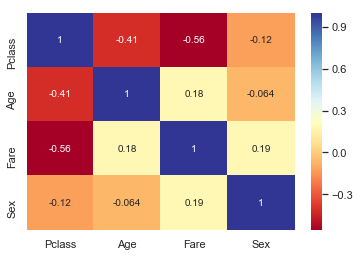

In [20]:
# Corrélations
correlation = full_data.corr()
sns.heatmap(correlation,annot = True, cmap = "RdYlBu")
plt.draw()

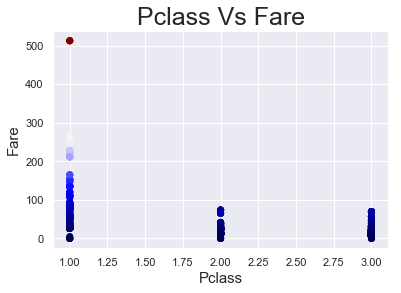

In [21]:
# Visualisons la correlation entre La classe(Pclass) et le Tarif (Fare)
plt.scatter(full_data["Pclass"],full_data["Fare"],  c = full_data["Fare"], cmap="seismic")
plt.title("Pclass Vs Fare", Fontsize = 25)
plt.xlabel("Pclass", Fontsize = 15)
plt.ylabel("Fare", Fontsize = 15)
plt.draw()

In [22]:
# visualisons les Na manquantes
full_data.isna().sum()

Pclass      0
Age       263
Fare        1
Sex         0
dtype: int64

In [23]:
# Remplissons les cases Na
full_data.fillna(value=0.0, inplace=True)

# visualisons les Na manquantes
full_data.isna().sum()

Pclass    0
Age       0
Fare      0
Sex       0
dtype: int64

In [24]:
# Divisons les données en Training et en testing 
X_train = full_data.values[0:891]
X_test = full_data.values[891:]

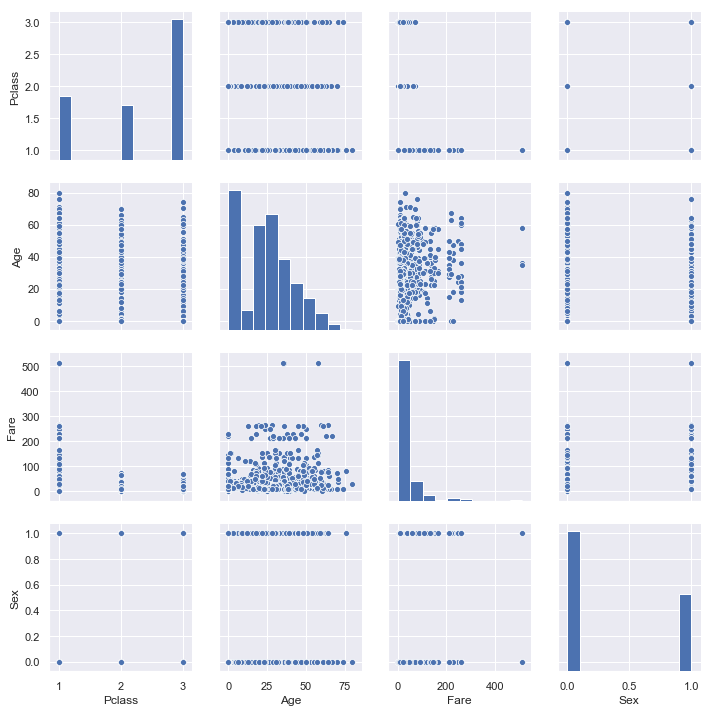

In [25]:
sns.pairplot(full_data)
plt.show()

### Scalabilité

In [26]:
# Mettons nos données à l'échelle
# Instance création
scaler = MinMaxScaler()

# Mise à l'échelle des deux set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Splitons les données
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.30, random_state = 12)

# Modèle: GradientBoostingClassifier

In [28]:
# Entraînons notre modèle
# Puis Evaluons notre modèle
larningRate_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

# Créons une boucle qui prédira avec les différents learning rate , pour savoir le meilleur
# On sait que le plus utiliser est souvent le 0.01
for learning_rate in larningRate_list:
    gb_clf = GradientBoostingClassifier(n_estimators = 20,
                                        learning_rate = learning_rate,
                                        max_features = 2, max_depth = 2, random_state = 0)
    gb_clf.fit(X_train, y_train)
    
    print("----------------------------------")
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

----------------------------------
Learning rate:  0.05
Accuracy score (training): 0.793
Accuracy score (validation): 0.739
----------------------------------
Learning rate:  0.075
Accuracy score (training): 0.817
Accuracy score (validation): 0.754
----------------------------------
Learning rate:  0.1
Accuracy score (training): 0.819
Accuracy score (validation): 0.754
----------------------------------
Learning rate:  0.25
Accuracy score (training): 0.838
Accuracy score (validation): 0.750
----------------------------------
Learning rate:  0.5
Accuracy score (training): 0.872
Accuracy score (validation): 0.791
----------------------------------
Learning rate:  0.75
Accuracy score (training): 0.878
Accuracy score (validation): 0.795
----------------------------------
Learning rate:  1
Accuracy score (training): 0.875
Accuracy score (validation): 0.784


Nous nous intéressons principalement à la précision du classificateur sur l'ensemble de validation, mais il semble qu'un taux d'apprentissage de **0,5** nous donne les meilleures performances sur l'ensemble de validation et de bonnes performances sur l'ensemble d'entraînement.

Classification Report:
---------------------
              precision    recall  f1-score   support

           0       0.80      0.88      0.83       161
           1       0.78      0.66      0.72       107

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268

Score Gradient boost: 0.8715890850722311
---------------------

Confusion Matrix:
-----------------


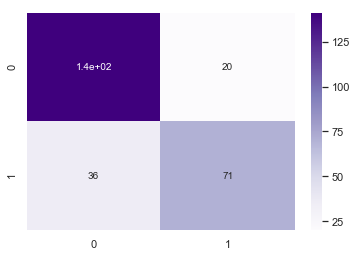

In [29]:
# Evaluons maintenant en vérifiant la précision en créant une matrice de confusion.
# " Nous gardons notre meilleur Learning rate"
gb_clf2 = GradientBoostingClassifier(n_estimators = 20, 

                                     learning_rate = 0.5, max_features = 2, max_depth = 2, random_state=0)
# Fit
gb_clf2.fit(X_train, y_train)

# Prédiction
predictions = gb_clf2.predict(X_val)

# Classification Report
print("Classification Report:")
print('---------------------')
print(classification_report(y_val, predictions))

# Score
Gdboost_score = gb_clf2.score(X_train, y_train)
print("Score Gradient boost:", Gdboost_score)
print('---------------------')
print('')
# Matrice de confusion
print("Confusion Matrix:")
print('-----------------')
confusion_matrice = confusion_matrix(y_val, predictions)
sns.heatmap(confusion_matrice, annot = True, cmap = 'Purples')
plt.show()

#### Confusion matrix:
- La première rangée concerne les prédictions de non-survie: **142 passagers** ont été correctement classés comme non survécus (appelés **vrais négatifs**) et **19** lorsqu'ils ont été classés à tort comme non survécus **(faux positifs)**.

- La deuxième rangée concerne les prévisions de survie: **42 passagers** ont été classés à tort comme ayant survécu **(faux négatifs)** et **65** ont été correctement classés comme ayant survécu **(vrais positifs)**.

#### Precision & Recall:
- Notre modèle prédit **77%** du temps, une survie correcte des passagers (précision). Le rappel nous dit qu'il prédit la survie de **61%** des personnes qui ont réellement survécu.

# Modèle: XGBoost Classifier

In [30]:
# Import du module
from xgboost import XGBClassifier

In [31]:
# Appliquons notre modèle
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Le score R2: 0.9004815409309791
-----------

Confusion Matrix:
-----------------


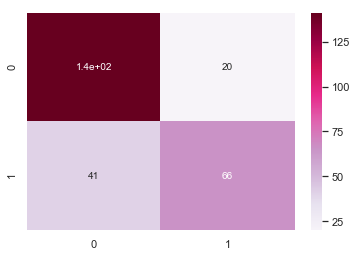

In [32]:
# Score XGBoost
score_xgboost = xgb_clf.score(X_train, y_train)
print("Le score R2:",score_xgboost)
print('-----------')
print('')

# Prédiction 
predictions = xgb_clf.predict(X_val)

# Matrice de confusion
print("Confusion Matrix:")
print('-----------------')
confusion_matrice_xgb = confusion_matrix(y_val, predictions)
sns.heatmap(confusion_matrice_xgb, annot = True, cmap = 'PuRd')
plt.show()

La comparaison de la précision de XGboost avec la précision d'un classificateur de gradient régulier montre que, dans ce cas, les résultats étaient très similaires. Cependant, ce ne sera pas toujours le cas et dans différentes circonstances, l'un des classificateurs pourrait facilement être plus performant que l'autre. Essayez de faire varier les arguments de ce modèle pour voir en quoi le résultat diffère.

 # Modèle: GridSearchCV

### - K-Nearest Neighbors

In [33]:
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.neighbors import KNeighborsClassifier

In [34]:
param_grid = {'n_neighbors': np.arange(1,20),
             'metric':['euclidean','manhattan'],
             'weights':['uniform','distance']}
grid = GridSearchCV(KNeighborsClassifier(),param_grid, cv = 5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
print("Best Score: ", grid.best_score_)
print("Best Params: ", grid.best_params_)
print("Best Estimator: ", grid.best_estimator_)
model_knn =  grid.best_estimator_

Best Score:  0.8330658105939005
Best Params:  {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}
Best Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


Score:
-----
0.8715890850722311

Confusion Matrix:
-----------------


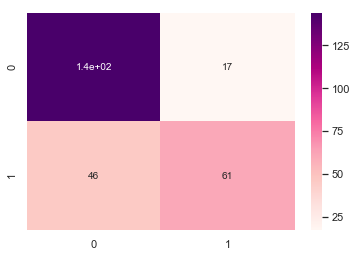

In [36]:
# Prédiction
predictions_knn = model_knn.predict(X_val)

# Score
Knn_score = model_knn.score(X_train,y_train)
print('Score:')
print('-----')
print(Knn_score)
print('')

# Matrice de confusion
print("Confusion Matrix:")
print('-----------------')
confusion_matrice_knn = confusion_matrix(y_val, predictions_knn)
sns.heatmap(confusion_matrice_knn, annot = True, cmap = 'RdPu')
plt.show()

### Courbe d'apprentissage
- Vérifier si la machine réussit à bien apprendre

[ 49  99 149 199 249 298 348 398 448 498]


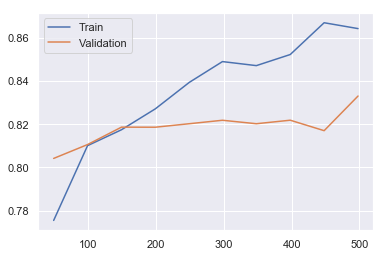

In [37]:
N, train_score, val_score = learning_curve(model_knn,X_train,y_train, train_sizes = np.linspace(0.1,1.0,10), cv = 5)

print(N)
plt.plot(N,train_score.mean(axis = 1), label = 'Train')
plt.plot(N,val_score.mean(axis = 1), label = 'Validation')
plt.legend()
plt.show()

### - Random Forest

In [38]:
# Paramètre GridSearchCV 
search_param = {
    "n_estimators": [100],
    "criterion": ["gini", "entropy"],
    'max_features': [0.5, 1.0, "sqrt"],
    'max_depth': [4, 5, 6, 7, 8, None],
}

# Créons une copy de notre dataset
data = full_data

# Tentons d'utiser unn random Forest Classifier avec GridSearch pour trouver des paramètres optimales pour prédire
forest = RandomForestClassifier(random_state = 0)
grid   = GridSearchCV(forest, search_param, cv = 12, verbose = 0)
grid.fit(X_train, y_train)

# Affichons le score et les meilleurs paramètres 
print(" Best Score :",grid.best_score_)
print(" Best Params :",grid.best_params_)

# -----------------------------------------------------------------------------------
# Les outputs que je garde: 
# {n_estimators = 100, criterion = 'gini', max_depth = 8, max_features = 0.5,random_state = 0}
# Je peux maintenant les placer dans RandomForestClassifier.

 Best Score : 0.8539325842696629
 Best Params : {'criterion': 'gini', 'max_depth': 7, 'max_features': 0.5, 'n_estimators': 100}


In [39]:
# Evaluons maintenant en vérifiant la précision en créant une matrice de confusion.
# " Nous gardons notre meilleur Learning rate"
RandForest_model = RandomForestClassifier(n_estimators = 100,
                                 criterion = 'gini', max_depth = 8, max_features = 0.5,random_state = 0)

# Entraînons le modèle et prédisons
RandForest_model.fit(X_train, y_train)
predictions_Rf = RandForest_model.predict(X_val)

In [40]:
#Affichons le nouveau Score.
rf_score = RandForest_model.score(X_train, y_train)
print("Score:", rf_score)
print('-----')
print()

# Classification Report
print("Classification Report")
print('---------------------')
print(classification_report(y_val, predictions_Rf))

Score: 0.9357945425361156
-----

Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       161
           1       0.79      0.62      0.69       107

    accuracy                           0.78       268
   macro avg       0.78      0.75      0.76       268
weighted avg       0.78      0.78      0.77       268



Confusion Matrix:
----------------


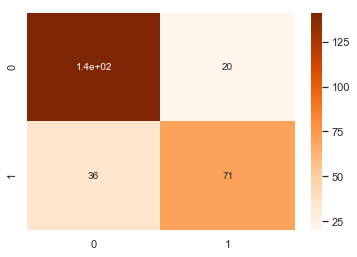

In [41]:
# Matrice de confusion
print("Confusion Matrix:")
print('----------------')
sns.heatmap(confusion_matrice, annot = True, cmap = 'Oranges')
confusion_matrice = confusion_matrix(y_val, predictions_Rf)

# Which model we can choose?
# Quelles modèle devons-nous choisir?

In [42]:
# Créons un tableau de score de chacun des modèles utilisés
resultat_model = pd.DataFrame({
    'Modèles': ['Gradiant Boost', 'XG Boost', 'K-Nearest Neighbors', 'Random Forest'],
    'Score': [Gdboost_score, score_xgboost, Knn_score, rf_score]})
df_score = resultat_model.sort_values(by='Score', ascending=False)
df_score = df_score.set_index('Score')
df_score.head(4)

,Modèles
Score,
0.935795,Random Forest
0.900482,XG Boost
0.871589,Gradiant Boost
0.871589,K-Nearest Neighbors


## Variables pertinantes

In [43]:
# Importances des variables en tableau
importances = pd.DataFrame({'feature':['PassengerId', 'Pclass', 'Fare', 'Sex'],
                            'importance':np.round(RandForest_model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending = False).set_index('feature')
importances

,importance
feature,
Sex,0.370
Fare,0.283
Pclass,0.226
PassengerId,0.121


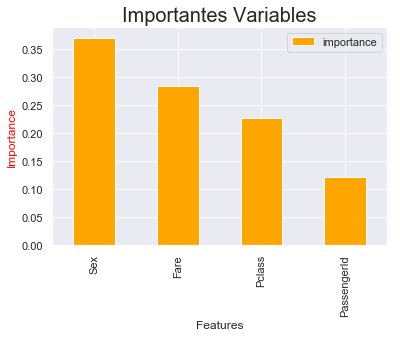

In [44]:
# Importances des variables en graphe
importances.plot.bar(color='orange')
plt.title("Importantes Variables", fontsize = 20)
plt.xlabel("Features")
plt.ylabel("Importance", color ="red")
plt.show()

# Test de prédiction

In [45]:
# Créons une fonction pour pouvoir tester nos préctions
# Mettons de valeurs par défaut : Pclass = 2, Age = 30, Fare = 70, Sex = 0 (Homme))
def titanic_survivor(RandForest_model, Pclass = 2, Age = 30, Fare = 70, Sex = 30):
    x = np.array([Pclass, Age, Fare, Sex]).reshape(1,4)  
    # Prédiction
    print(RandForest_model.predict(x))   
    # Probabibilté que je j'appartienne à la class (Survie)
    print(RandForest_model.predict_proba(x) * 100)

-  A-t'il survécu au naufrage du Titanic?
-  Did he survive the sinking of the Titanic?

In [46]:
 titanic_survivor(RandForest_model)

[0]
[[74.11904762 25.88095238]]


- *Malheureusement il n'as pas survécu  !!!* Triste
- *Unfortunately he did not survive !!!* Sad

# Summary prediction Test

Il a 80% de chance d'appartenir à la classe [0] et 19% de chance d'appartenir à la classe [1]

# Conclusion Modèle 

On peut voir que on obtient un grand score avec le modèle RandomForestClassifier
Il nous a fallut dégager les bon paramètres avec Grid Search.

We can see that we get a great score with the RandomForestClassifier model
We had to find the right parameters with Grid Search.

                                                                                                                FIN